# Exploratory Data Analysis
---


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../scripts')
from data_utils import path, column_order, labels

In [2]:
# Load data
data_entry_df = pd.read_pickle('../data/interim/data_entry_df.pkl')
train_val_list = pd.read_pickle('../data/interim/train_val_list.pkl')
test_list = pd.read_pickle('../data/interim/test_list.pkl')
patient_data = pd.read_pickle('../data/interim/patient_data.pkl')

In [3]:
# Show unique classes
labels_exploded = data_entry_df["finding_labels"].str.split('|').explode()
sorted(labels_exploded.unique())

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [4]:
# Inner joined data between data_entry_df and both test and training datasets
# Created a new filtered dataset where it includes data from both datasets only where 'image_index' matches both datasets

filtered_test_list = data_entry_df.merge(test_list, on='image_index', how='inner')
filtered_train_val_list = data_entry_df.merge(train_val_list, on='image_index', how='inner')

display(filtered_test_list.head())
display(filtered_train_val_list.head())

,image_index,finding_labels,follow_up_number,patient_id,patient_age,patient_gender,view_position,original_img_width,original_img_height,img_pixel_spacing_x,img_pixel_spacing_y
0,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143
1,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168
2,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168
3,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143
4,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168


,image_index,finding_labels,follow_up_number,patient_id,patient_age,patient_gender,view_position,original_img_width,original_img_height,img_pixel_spacing_x,img_pixel_spacing_y
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000004_000.png,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168,0.168


## Split and encode target variable

In [5]:
# encode target variable classes (train_val_list)
train_X = filtered_train_val_list.drop("finding_labels", axis=1)
train_y = filtered_train_val_list["finding_labels"]

# y = target variable
# X = features

def create_labels(X, y):
    mlb = MultiLabelBinarizer()

    y_split = y.str.split('|')
    y_encoded = mlb.fit_transform(y_split)
    classes = mlb.classes_

    encoded_df = pd.DataFrame(columns=classes, data=y_encoded)
    labeled_df = X.join(encoded_df,how="inner").drop(columns=['original_img_height', 'img_pixel_spacing_x', 'img_pixel_spacing_y'], axis=1)
    labeled_df = labeled_df.reindex(columns=column_order)
    labeled_df[labels] = labeled_df[labels].fillna(0).astype(int) #fill missing data with 0

    return labeled_df


train_val_labels = create_labels(train_X, train_y)
train_val_labels.head()

,image_index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,follow_up_number,patient_id,patient_age,patient_gender,view_position
0,00000001_000.png,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,58,M,PA
1,00000001_001.png,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,58,M,PA
2,00000001_002.png,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,2,1,58,M,PA
3,00000002_000.png,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,81,M,PA
4,00000004_000.png,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,82,M,AP


In [6]:
# encode target variable classes (test_list)
test_X = filtered_test_list.drop("finding_labels", axis=1)
test_y = filtered_test_list["finding_labels"]

test_labels = create_labels(test_X,test_y)
test_labels.head()

,image_index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,follow_up_number,patient_id,patient_age,patient_gender,view_position
0,00000003_000.png,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,3,81,F,PA
1,00000003_001.png,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,3,74,F,PA
2,00000003_002.png,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,2,3,75,F,PA
3,00000003_003.png,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,3,3,76,F,PA
4,00000003_004.png,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,4,3,77,F,PA


## Descriptive Statistical Analysis

In [7]:
# reset index  
flat_df = patient_data.reset_index()
flat_df.head()

,patient_id,follow_up_number,image_index,finding_labels,patient_age,patient_gender,view_position
0,1,0,00000001_000.png,Cardiomegaly,58,M,PA
1,1,1,00000001_001.png,Cardiomegaly|Emphysema,58,M,PA
2,1,2,00000001_002.png,Cardiomegaly|Effusion,58,M,PA
3,2,0,00000002_000.png,No Finding,81,M,PA
4,3,0,00000003_000.png,Hernia,81,F,PA


In [8]:
# total number of unique patients
data_entry_df["patient_id"].nunique()

30802

In [9]:
# checking dataset dimensions
print(f'Patient data shape: {flat_df.shape}')
print(f'Data entry shape: {data_entry_df.shape}')

Patient data shape: (112104, 7)
Data entry shape: (112104, 11)


In [10]:
# cheking data types
flat_df.info()
data_entry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112104 entries, 0 to 112103
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   patient_id        112104 non-null  int64 
 1   follow_up_number  112104 non-null  int64 
 2   image_index       112104 non-null  object
 3   finding_labels    112104 non-null  object
 4   patient_age       112104 non-null  int64 
 5   patient_gender    112104 non-null  object
 6   view_position     112104 non-null  object
dtypes: int64(3), object(4)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 112104 entries, 0 to 112119
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   image_index          112104 non-null  object 
 1   finding_labels       112104 non-null  object 
 2   follow_up_number     112104 non-null  int64  
 3   patient_id           112104 non-null  int64  
 4   

Average patient age: 46.09


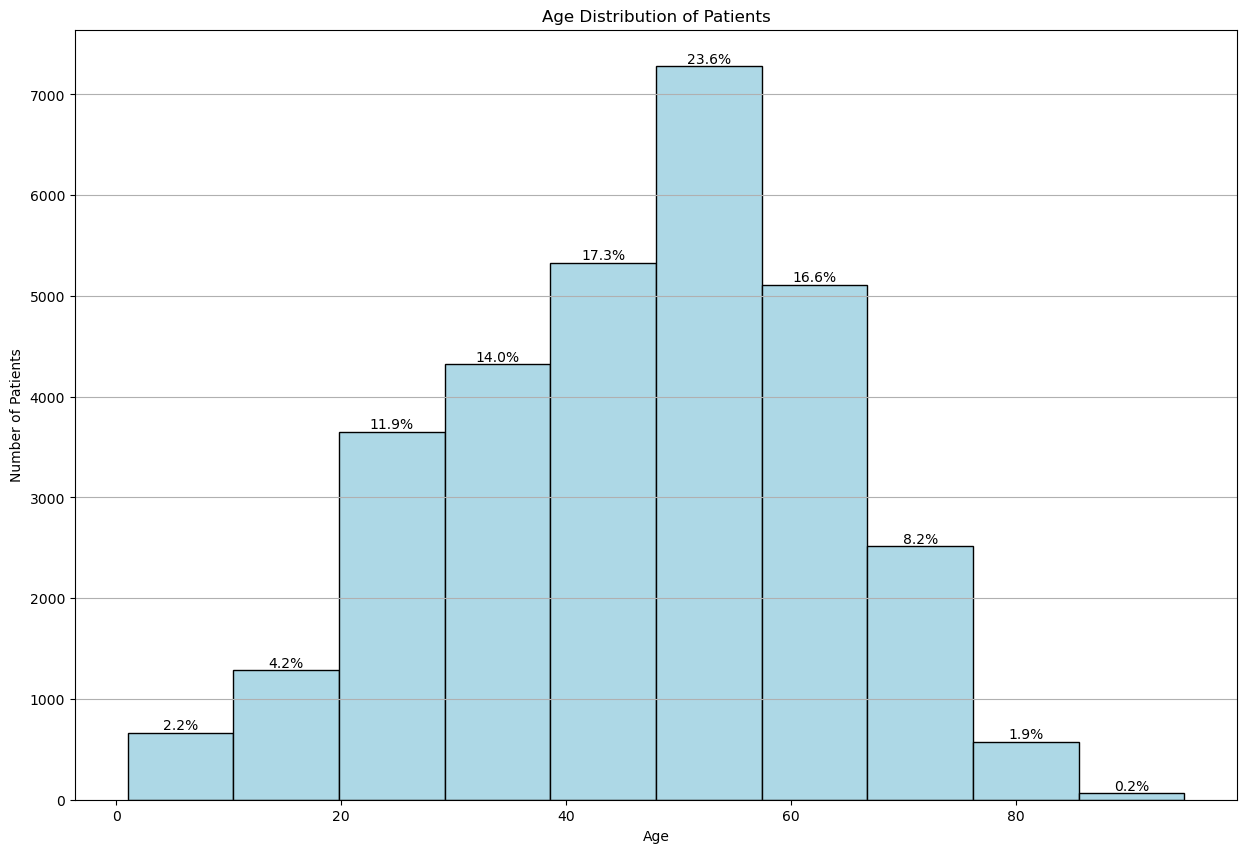

In [11]:
# Age distribution of patients

# extracted the age of each unique patient
patient_ages = flat_df.groupby("patient_id")["patient_age"].first()

# calculated the average patient age
print(f'Average patient age: {patient_ages.mean().round(2)}')

# plotted histogram 
plt.figure(figsize=(15,10))
counts, bins, patches = plt.hist(patient_ages, bins=10, color="lightblue",edgecolor="black")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")

total = counts.sum()
percentages = [f"{(c/total * 100):.1f}%" for c in counts]

plt.bar_label(patches, labels=percentages)
plt.grid(axis='y')
plt.show()

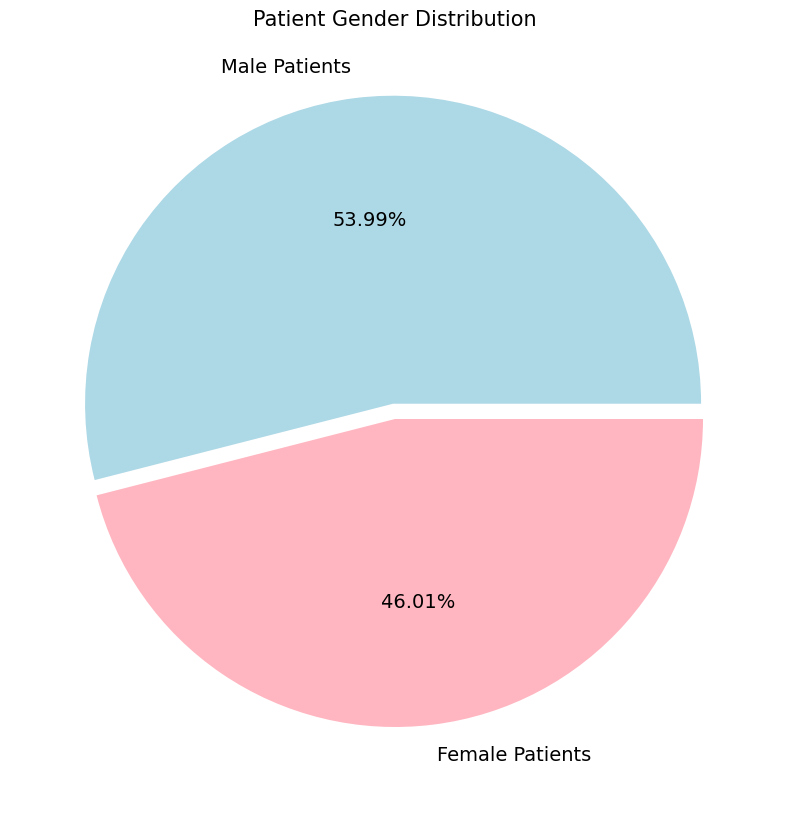

In [12]:
# Patient gender distribution

# extracted gender of each unique patient
patient_gender = flat_df.groupby("patient_id")["patient_gender"].first()
gender = patient_gender.value_counts()

# plot pie chart
plt.figure(figsize=(15,10))
plt.pie(gender.values, labels=["Male Patients", "Female Patients"], autopct="%.2f%%", explode=[0.05,0], colors=["lightblue", "lightpink"], textprops={"fontsize": 14})
plt.title("Patient Gender Distribution", fontsize=15)
plt.show()

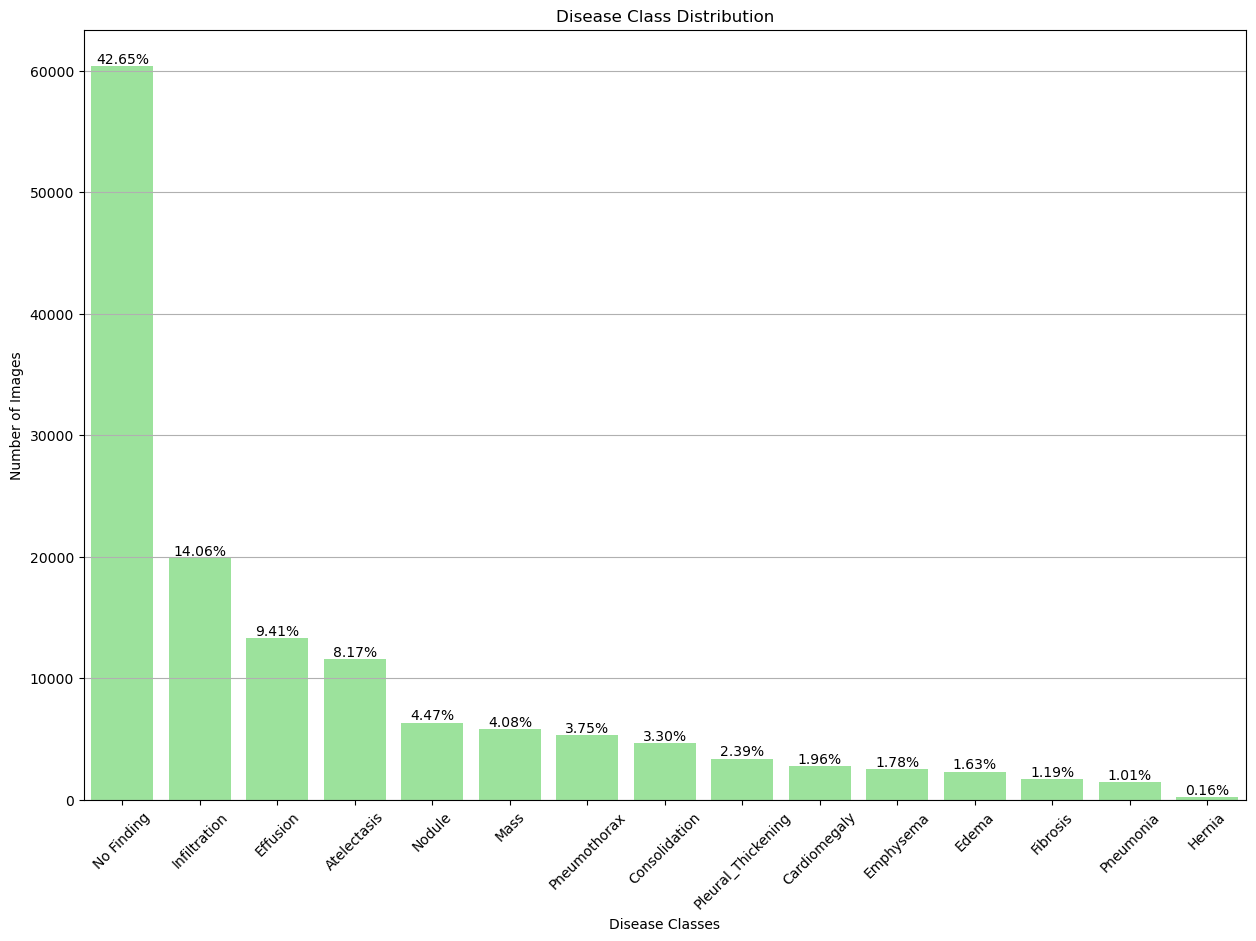

In [13]:
# Distribution of disease classes
# Did not extract for each unique patients so graph would account for new deseases from follow-ups 

labels_exploded = data_entry_df["finding_labels"].str.split('|').explode()
label_counts = labels_exploded.value_counts()

plt.figure(figsize=(15,10))
sns.barplot(x=label_counts.index, y=label_counts.values, color="lightgreen")
plt.xticks(rotation=45)
plt.title("Disease Class Distribution")
plt.xlabel("Disease Classes")
plt.ylabel("Number of Images")

total = label_counts.sum()

for index, count in enumerate(label_counts.values):
    percentage = (count/ total) * 100
    plt.text(index, count + 2, f'{percentage:.2f}%', ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

The distribution of classes is dominated by class ("No Finding"). The gap between the top class the the next may have a large impact on model performance as models tend to bias the majority class while potentially not learning the classes with less labels such as the "Hernia" or "Pneumonia" class.

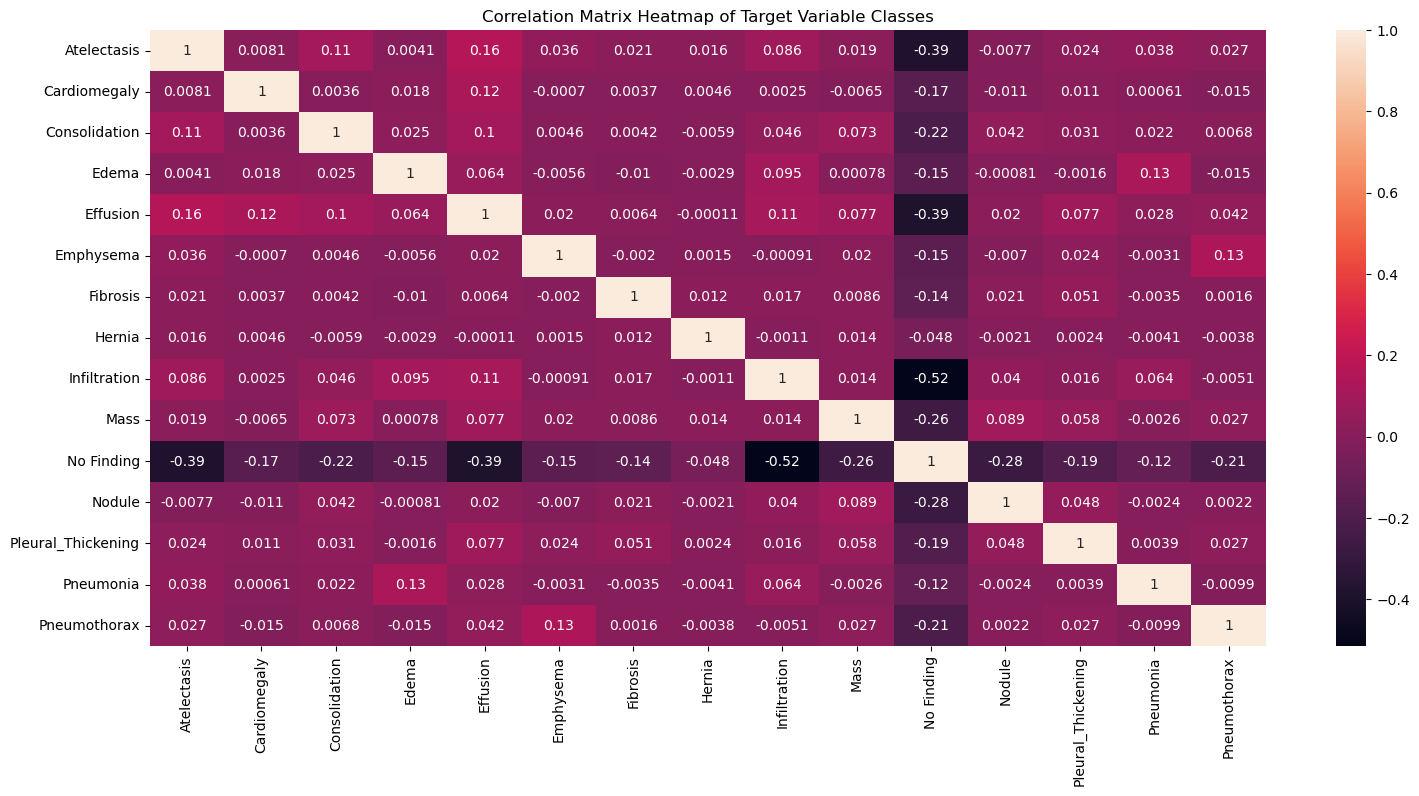

In [14]:
# Plot correlation matrix 

train_labels_only = train_val_labels.drop(columns=["image_index", "follow_up_number", "patient_age", "patient_id", "patient_gender", "view_position"])
corr_matrix = train_labels_only.corr()

plt.figure(figsize=(18,8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix Heatmap of Target Variable Classes")
plt.show()

The correlation matrix reveals that most diseases have a weak positive or negative correlation to each other, signifying a weak linear relationship. The "No Finding" class as negative correlation with every disease and a moderate to strong negative correlation with the "Effusion" and "Infiltration" class, signifying an inverse relationship. 

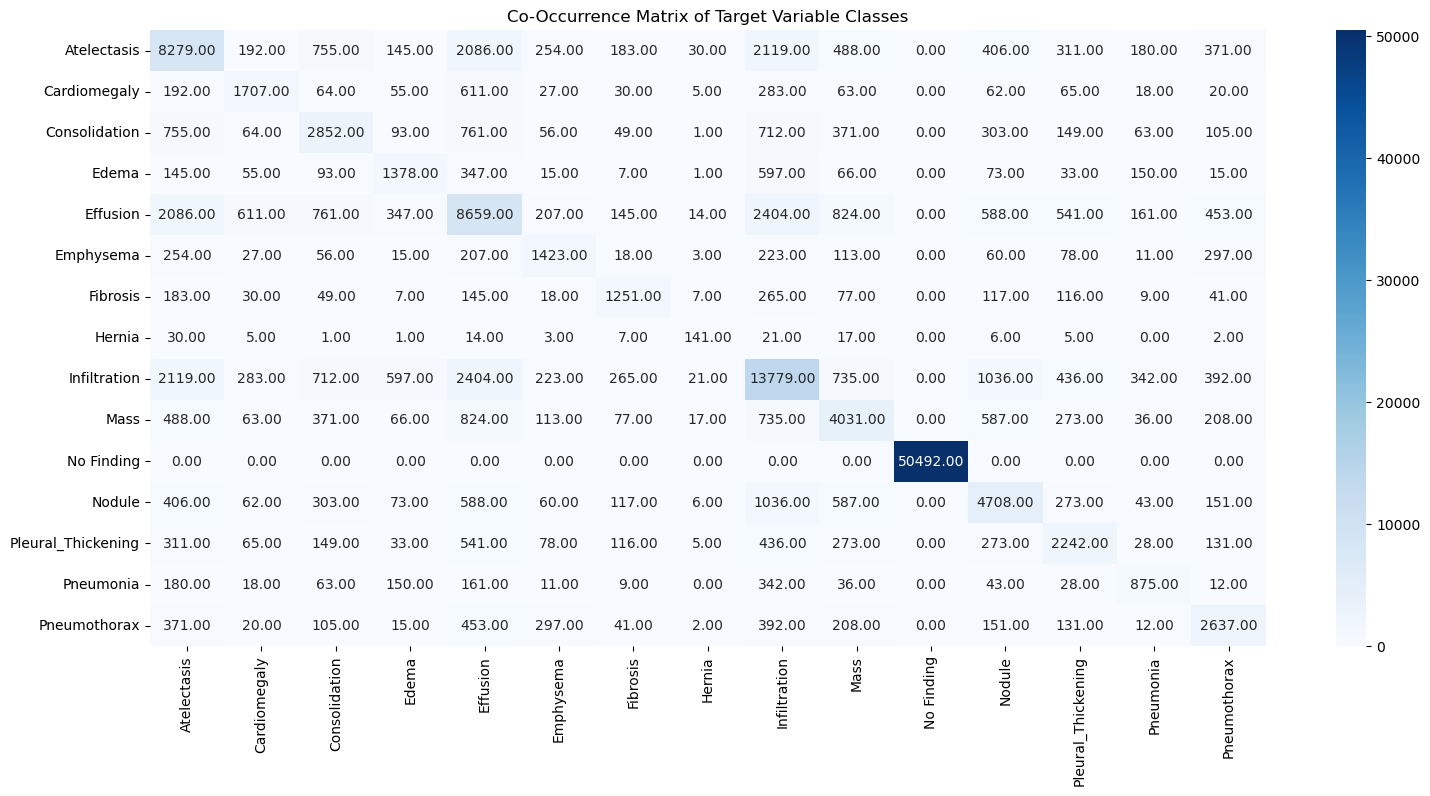

In [15]:
# Plot Co-occurence matrix
co_occurrence = train_labels_only.T.dot(train_labels_only)

plt.figure(figsize=(18,8))
sns.heatmap(co_occurrence, annot=True, cmap="Blues", fmt=".2f")
plt.title("Co-Occurrence Matrix of Target Variable Classes")
plt.show()

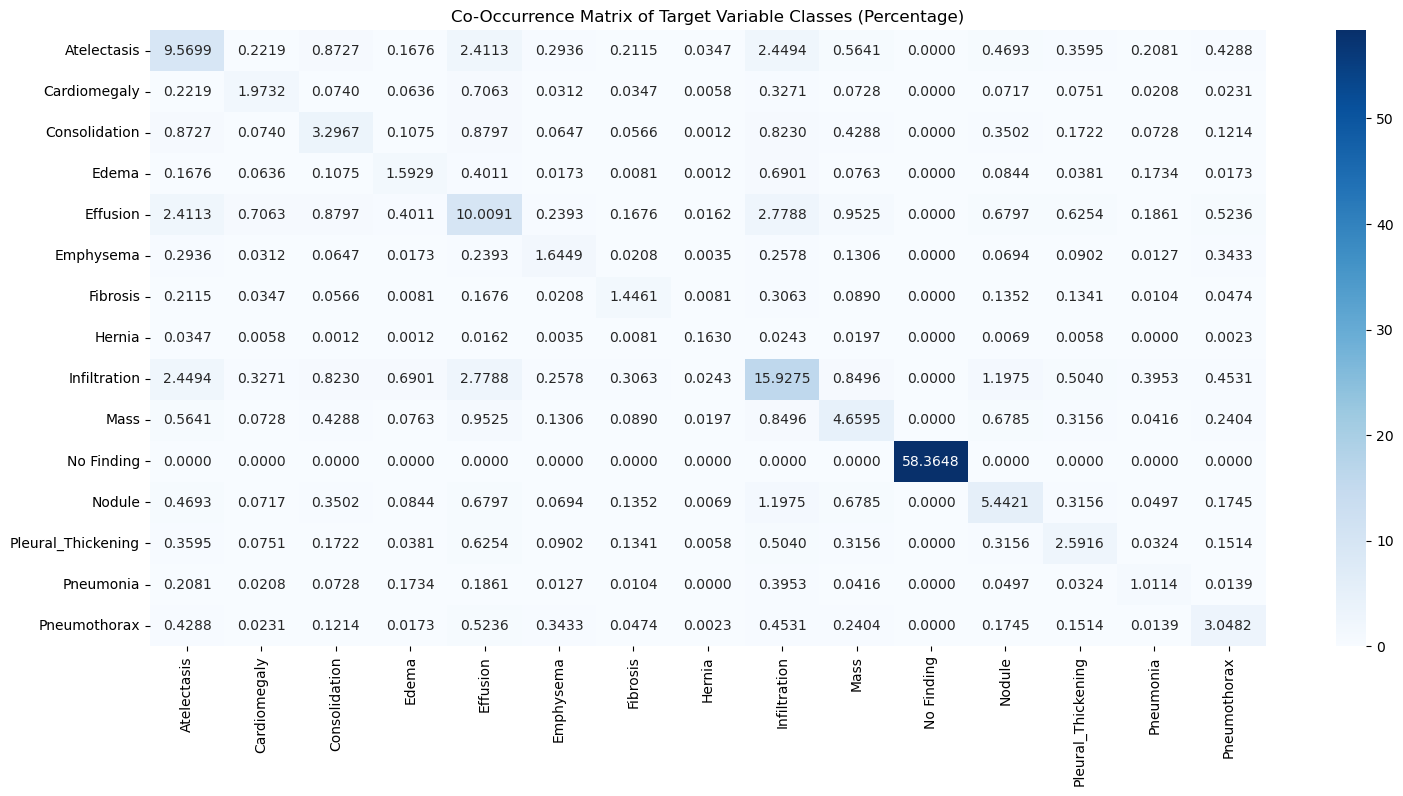

In [16]:
# Plot Co-occurence matrix (percentage)

plt.figure(figsize=(18,8))
sns.heatmap((co_occurrence/ train_labels_only.shape[0])*100, annot=True, cmap="Blues", fmt=".4f")
plt.title("Co-Occurrence Matrix of Target Variable Classes (Percentage)")
plt.show()

The co-occurrence matrix reveals that the "Actelectasis", "Effusion", and "Infiltration" class often appear together, at around 2.4% of the dataset or roughly 2000 samples in the dataset. 

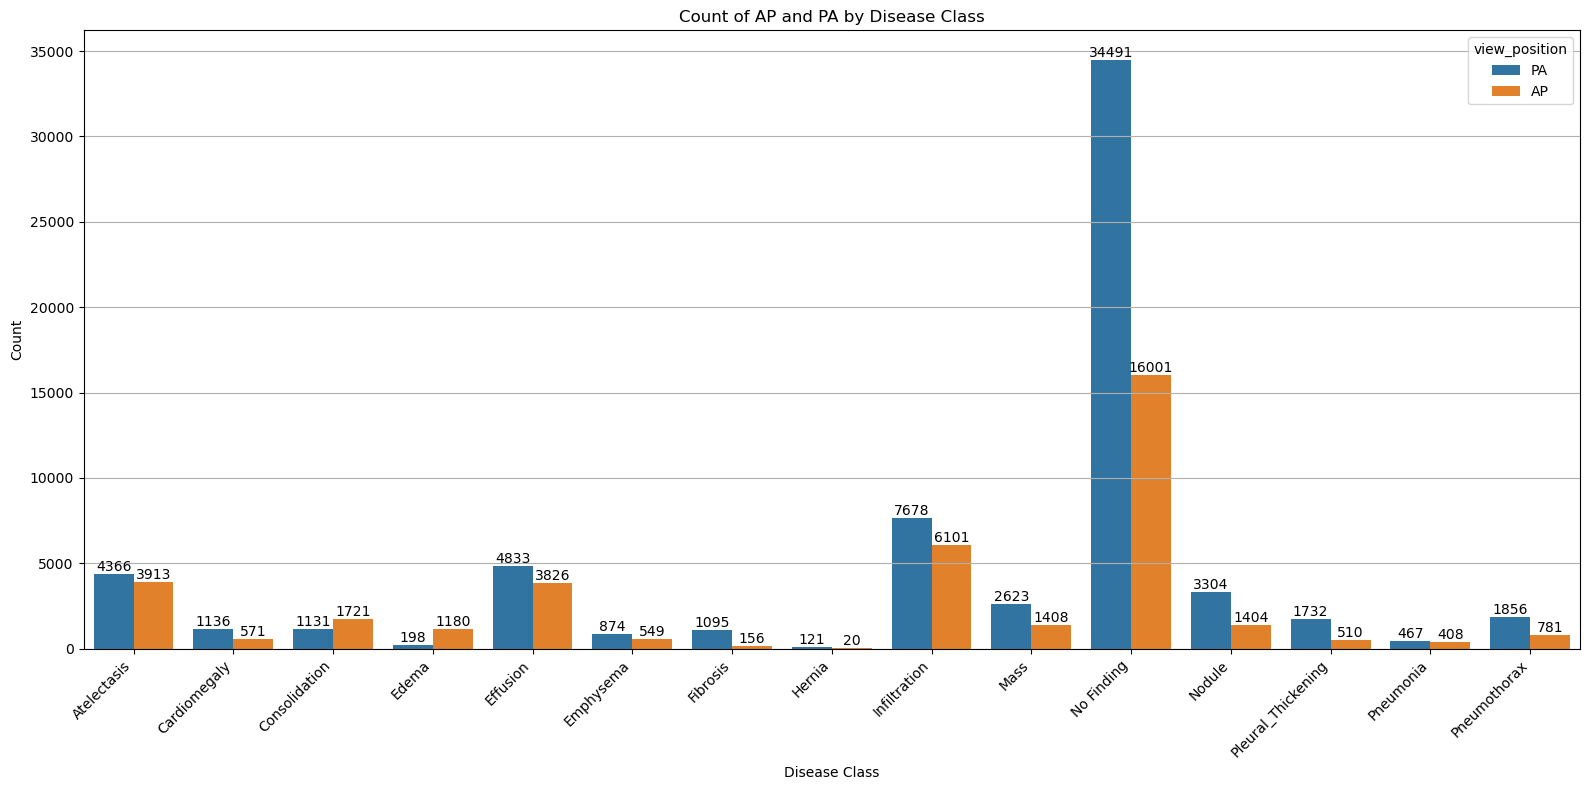

In [17]:
# Countplot comparing the distribution of label classes based on view position

train_val_labels_countplot = train_val_labels[labels + ["view_position"]]

df_melted = train_val_labels_countplot.melt(id_vars=["view_position"], value_vars=labels, var_name="Disease", value_name="present")
df_melted = df_melted[df_melted["present"]==1]

plt.figure(figsize=(16,8))
countplot = sns.countplot(x="Disease", data=df_melted, hue="view_position")

for container in countplot.containers:
    countplot.bar_label(container, fmt='%d')

plt.xticks(rotation=45, ha="right")
plt.title("Count of AP and PA by Disease Class")
plt.ylabel("Count")
plt.xlabel("Disease Class")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

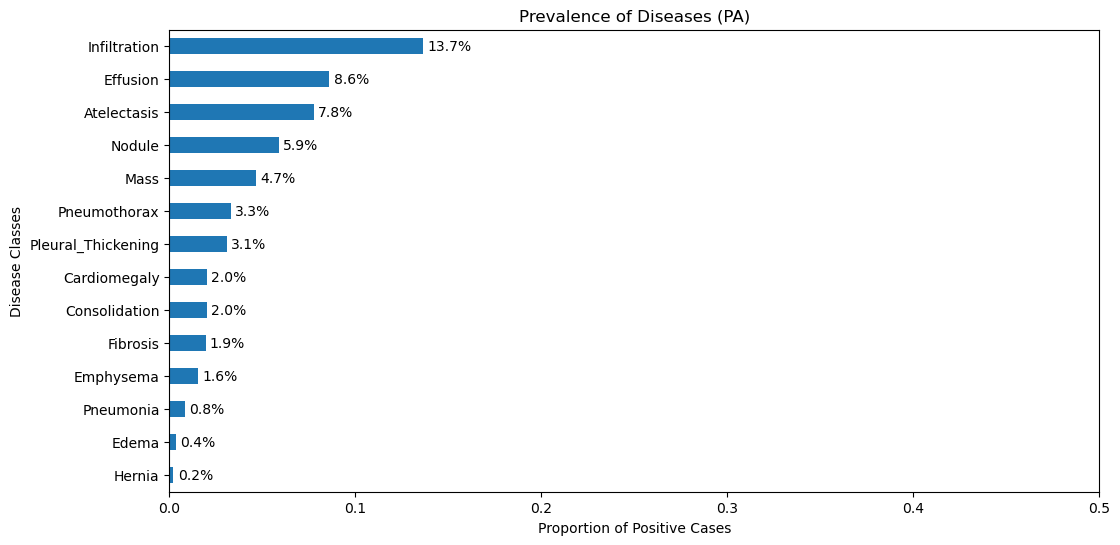

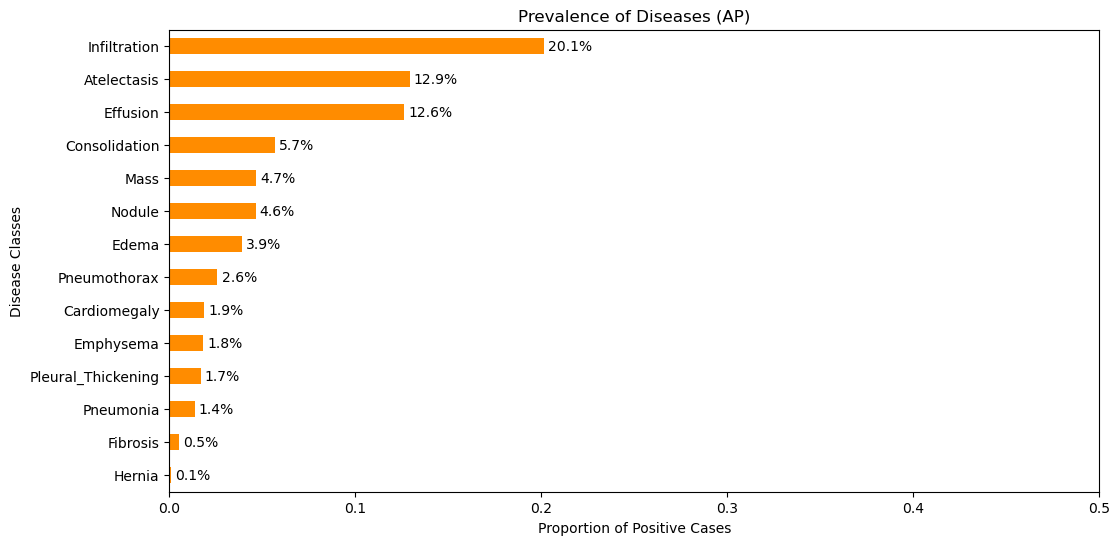

The average number of diseases per sample for x-rays taken in a PA view is 0.56
The average number of diseases per sample for x-rays taken in a AP view is 0.74
Samples taken in AP have an average of 0.18 more diseases per sample
AP samples have about 32.0% more diseases per sample on average to PA samples


In [38]:
# Horizontal bar plot of prevalence of disease based on view position

pa_train_val_labels = train_val_labels.loc[train_val_labels["view_position"] == "PA", labels].drop(columns=["No Finding"], axis=1)
ap_train_val_labels = train_val_labels.loc[train_val_labels["view_position"] == "AP", labels].drop(columns=["No Finding"], axis=1)

prevalence_pa = (pa_train_val_labels.sum()/pa_train_val_labels.shape[0]).round(4).sort_values(ascending=True)
prevalence_ap = (ap_train_val_labels.sum()/ap_train_val_labels.shape[0]).round(4).sort_values(ascending=True)

# PA view
plt.figure(figsize=(12,6))
ax = prevalence_pa.plot(kind="barh")
ax.bar_label(ax.containers[0], labels=[f"{p*100:.1f}%" for p in prevalence_pa.values], padding=3)
plt.title("Prevalence of Diseases (PA)")
plt.xlabel("Proportion of Positive Cases")
plt.ylabel("Disease Classes")
plt.xlim(0,0.5)
plt.show()

# AP view
plt.figure(figsize=(12,6))
ax = prevalence_ap.plot(kind="barh", color="darkorange")
ax.bar_label(ax.containers[0], labels=[f"{p*100:.1f}%" for p in prevalence_ap.values], padding=3)
plt.title("Prevalence of Diseases (AP)")
plt.xlabel("Proportion of Positive Cases")
plt.ylabel("Disease Classes")
plt.xlim(0,0.5)
plt.show()

# Summary
print(f"The average number of diseases per sample for x-rays taken in a PA view is {prevalence_pa.sum().round(2)}")
print(f"The average number of diseases per sample for x-rays taken in a AP view is {prevalence_ap.sum().round(2)}")
print(f"Samples taken in AP have an average of {(prevalence_ap.sum() - prevalence_pa.sum()).round(2)} more diseases per sample")
print(f"AP samples have about {((prevalence_ap.sum().round(2) - prevalence_pa.sum().round(2))/prevalence_pa.sum().round(2)).round(2)*100}% more diseases per sample on average to PA samples")

These prevelance charts compares the probability that a randomly selected sample has a given disease based on view position. Based on the charts above, patients with x-rays taken in AP view have roughly 6-7% higher probability of being diagnosed with infiltration and a 4-5% higher chance for atelectasis and effusion while patients with x-rays taken in PA view have a slightly higher probabiltiy (0-2%) in virtually all other diseases. The average number of disease per sample for AP and PA view are 0.74 and 0.56, meaning that on average, samples in AP view have an average of 0.18 more diseases or 32% more diseases per sample when compared to PA samples

In [90]:
# Export data

train_val_labels.to_csv('../data/labels/train_val_labels.csv')
test_labels.to_csv('../data/labels/test_labels.csv')